# Example 11.3: Heat Pump

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A vapor compression heat pump system uses R-134a as the working fluid.  The refrigerant enters the compressor at $2.4\ \mathrm{bar}$ and $0^\circ\mathrm{C}$ with a volumetric flow rate of $0.6\ \mathrm{m^3/min}$.  The compression is adiabatic to $9\ \mathrm{bar}$ and $60^\circ\mathrm{C}$.  Saturated liquid exits the condenser at $9\ \mathrm{bar}$. Determine the:
* (a) Power input to the compressor
* (b) Heating capacity
* (c) Coefficient of performance
* (d) Isentropic efficiency the compressor
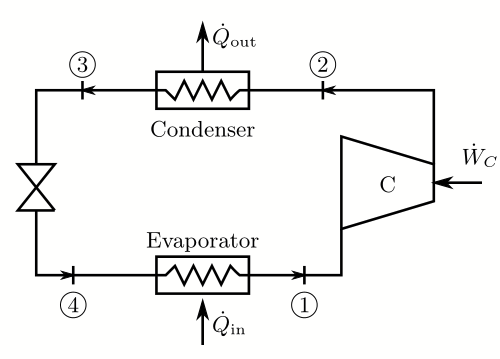

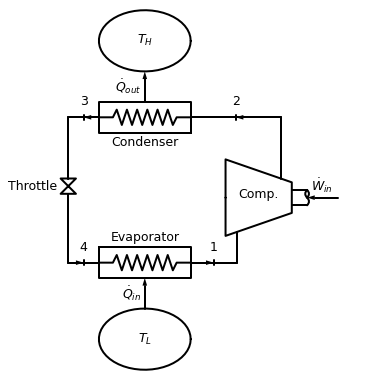

In [1]:
from IPython.display import Image
# import schematics # <- uncomment to regenerate schematic
# schematics.refrigeration_cycle(file='Figures/refrigeration_cycle.png');# <- uncomment to regenerate schematic

Image('Figures/refrigeration_cycle.png')

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=2005373&node=7667530&a=1952343514&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.default import *
   
r134a = realfluid.Properties('R134a')

### Given Parameters
We now define variables to hold our known values.

In [4]:
p[1] = Quantity(2.4, 'bar')  # Compressor inlet pressure
T[1] = Quantity(0, 'degC')  # Compressor inlet temperature
Vdot[1] = Quantity(0.6, 'm^3/min')  # Compressure inlet volumetric flow rate
p[2] = Quantity(9, 'bar')  # Compressor outlet pressure
T[2] = Quantity(60, 'degC')  # Compressor outlet temperature
x[3] = 0  # Condenser outet quality

Summary()

### Assumptions
- Non-ideal work devices
- Saturated liquid at condenser exit
- Isobaric heat exchangers
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [5]:
p[4] = p[1]
p[3] = p[2]

Summary()

### (a) Power input to the compressor

In [6]:
%%showcalc
"### Mass flow rate"
v[1] = r134a.v(T[1], p[1])
mdot = Vdot[1] / v[1]
"### 1st Law for compressor"
h[1] = r134a.h(T[1], p[1])
h[2] = r134a.h(T[2], p[2])
w_in = h[2] - h[1]
Wdot_in = mdot * w_in

### Mass flow rate
\begin{align}
  {v}_{ 1 } &=  \mathrm{ \underset{ r134a }{ v } }\left( {T}_{ 1 }, {p}_{ 1 } \right)  = \mathrm{ \underset{ r134a }{ v } }\left( 273.15\ \mathrm{K}, 240.0\ \mathrm{kPa} \right) = 0.08617\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  \dot{m} &=  \frac{ {\dot{V}}_{ 1 } }{ {v}_{ 1 } } \\
    &= \frac{ 0.01\ \frac{\mathrm{m}^{3}}{\mathrm{s}} }{ 0.08617\ \frac{\mathrm{m}^{3}}{\mathrm{kg}} }\\
    &= 0.11605\ \frac{\mathrm{kg}}{\mathrm{s}}
\end{align}

### 1st Law for compressor
\begin{align}
  {h}_{ 1 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {T}_{ 1 }, {p}_{ 1 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 273.15\ \mathrm{K}, 240.0\ \mathrm{kPa} \right) = 400.11\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ 2 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {T}_{ 2 }, {p}_{ 2 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 333.15\ \mathrm{K}, 900.0\ \mathrm{kPa} \right) = 443.28\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  w_{in} &=   {h}_{ 2 } - {h}_{ 1 }  \\
    &=  443.28\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 400.11\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 43.163\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  \dot{W}_{in} &=   \dot{m}  \cdot  w_{in}  \\
    &=  0.11605\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  43.163\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 5.0091\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}



### (b) Heating Capacity

In [7]:
%%showcalc
"### Heat output"
h[3] = r134a.h(p[3], x[3])
q_out = h[2] - h[3]
Qdot_out = mdot * q_out

### Heat output
\begin{align}
  {h}_{ 3 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ 3 }, {x}_{ 3 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 900.0\ \mathrm{kPa}, 0 \right) = 249.78\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  q_{out} &=   {h}_{ 2 } - {h}_{ 3 }  \\
    &=  443.28\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 249.78\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 193.5\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  \dot{Q}_{out} &=   \dot{m}  \cdot  q_{out}  \\
    &=  0.11605\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  193.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 22.455\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}



### (c) $COP_{HP}$

In [8]:
%%showcalc
COP_HP = Qdot_out / Wdot_in

\begin{align}
  COP_{HP} &=  \frac{ \dot{Q}_{out} }{ \dot{W}_{in} } \\
    &= \frac{ 22.455\ \frac{\mathrm{kJ}}{\mathrm{s}} }{ 5.0091\ \frac{\mathrm{kJ}}{\mathrm{s}} }\\
    &= 4.4829
\end{align}



### (d) Compressor isentropic efficiency

In [9]:
%%showcalc
"Isentropic exit state"
s[1] = r134a.s(T[1], p[1])
s['2s'] = s[1]
h['2s'] = r134a.h(p[2], s[1])
"Isentropic efficiency"
eta_c = (h['2s'] - h[1]) / (h[2] - h[1])

Isentropic exit state
\begin{align}
  {s}_{ 1 } &=  \mathrm{ \underset{ r134a }{ s } }\left( {T}_{ 1 }, {p}_{ 1 } \right)  = \mathrm{ \underset{ r134a }{ s } }\left( 273.15\ \mathrm{K}, 240.0\ \mathrm{kPa} \right) = 1.7475\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {s}_{ \mathrm{2s} } &=  {s}_{ 1 }  = 1.7475\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {h}_{ \mathrm{2s} } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ 2 }, {s}_{ 1 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 900.0\ \mathrm{kPa}, 1.7475\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 428.39\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

Isentropic efficiency
\begin{align}
  \eta_{c} &=  \frac{  {h}_{ \mathrm{2s} } - {h}_{ 1 }  }{  {h}_{ 2 } - {h}_{ 1 }  } \\
    &= \frac{  428.39\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 400.11\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }{  443.28\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 400.11\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }\\
    &= 0.65504
\end{align}



### Diagrams

In [11]:
# Remaining properties
h[4] = h[3]
for i in [1, 2, 3, 4, '2s']:
    states.fix(i, r134a)
states.display();

,$T$ [K],$p$ [kPa],$v$ [m³/kg],$u$ [kJ/kg],$h$ [kJ/kg],$s$ [kJ/K/kg],$x$ [],$phase$ [],$\dot{V}$ [m³/s],$c_{v}$ [kJ/K/kg],$c_{p}$ [kJ/K/kg]
1,273.150000,240.0,0.086170,379.432445,400.113255,1.747534,N/A,gas,0.01,0.746551,0.868606
2,333.150000,900.0,0.026146,419.745099,443.276423,1.793220,N/A,gas,-,0.864929,1.029554
2s,318.838005,900.0,0.024206,406.601832,428.386931,1.747534,N/A,gas,-,0.860699,1.056394
3,308.676110,900.0,0.000858,249.007500,249.779795,1.169479,0,twophase,-,0.926927,1.473622
4,267.784675,240.0,0.024132,243.988164,249.779795,1.186310,0.281077,twophase,-,1.296107,2.480688


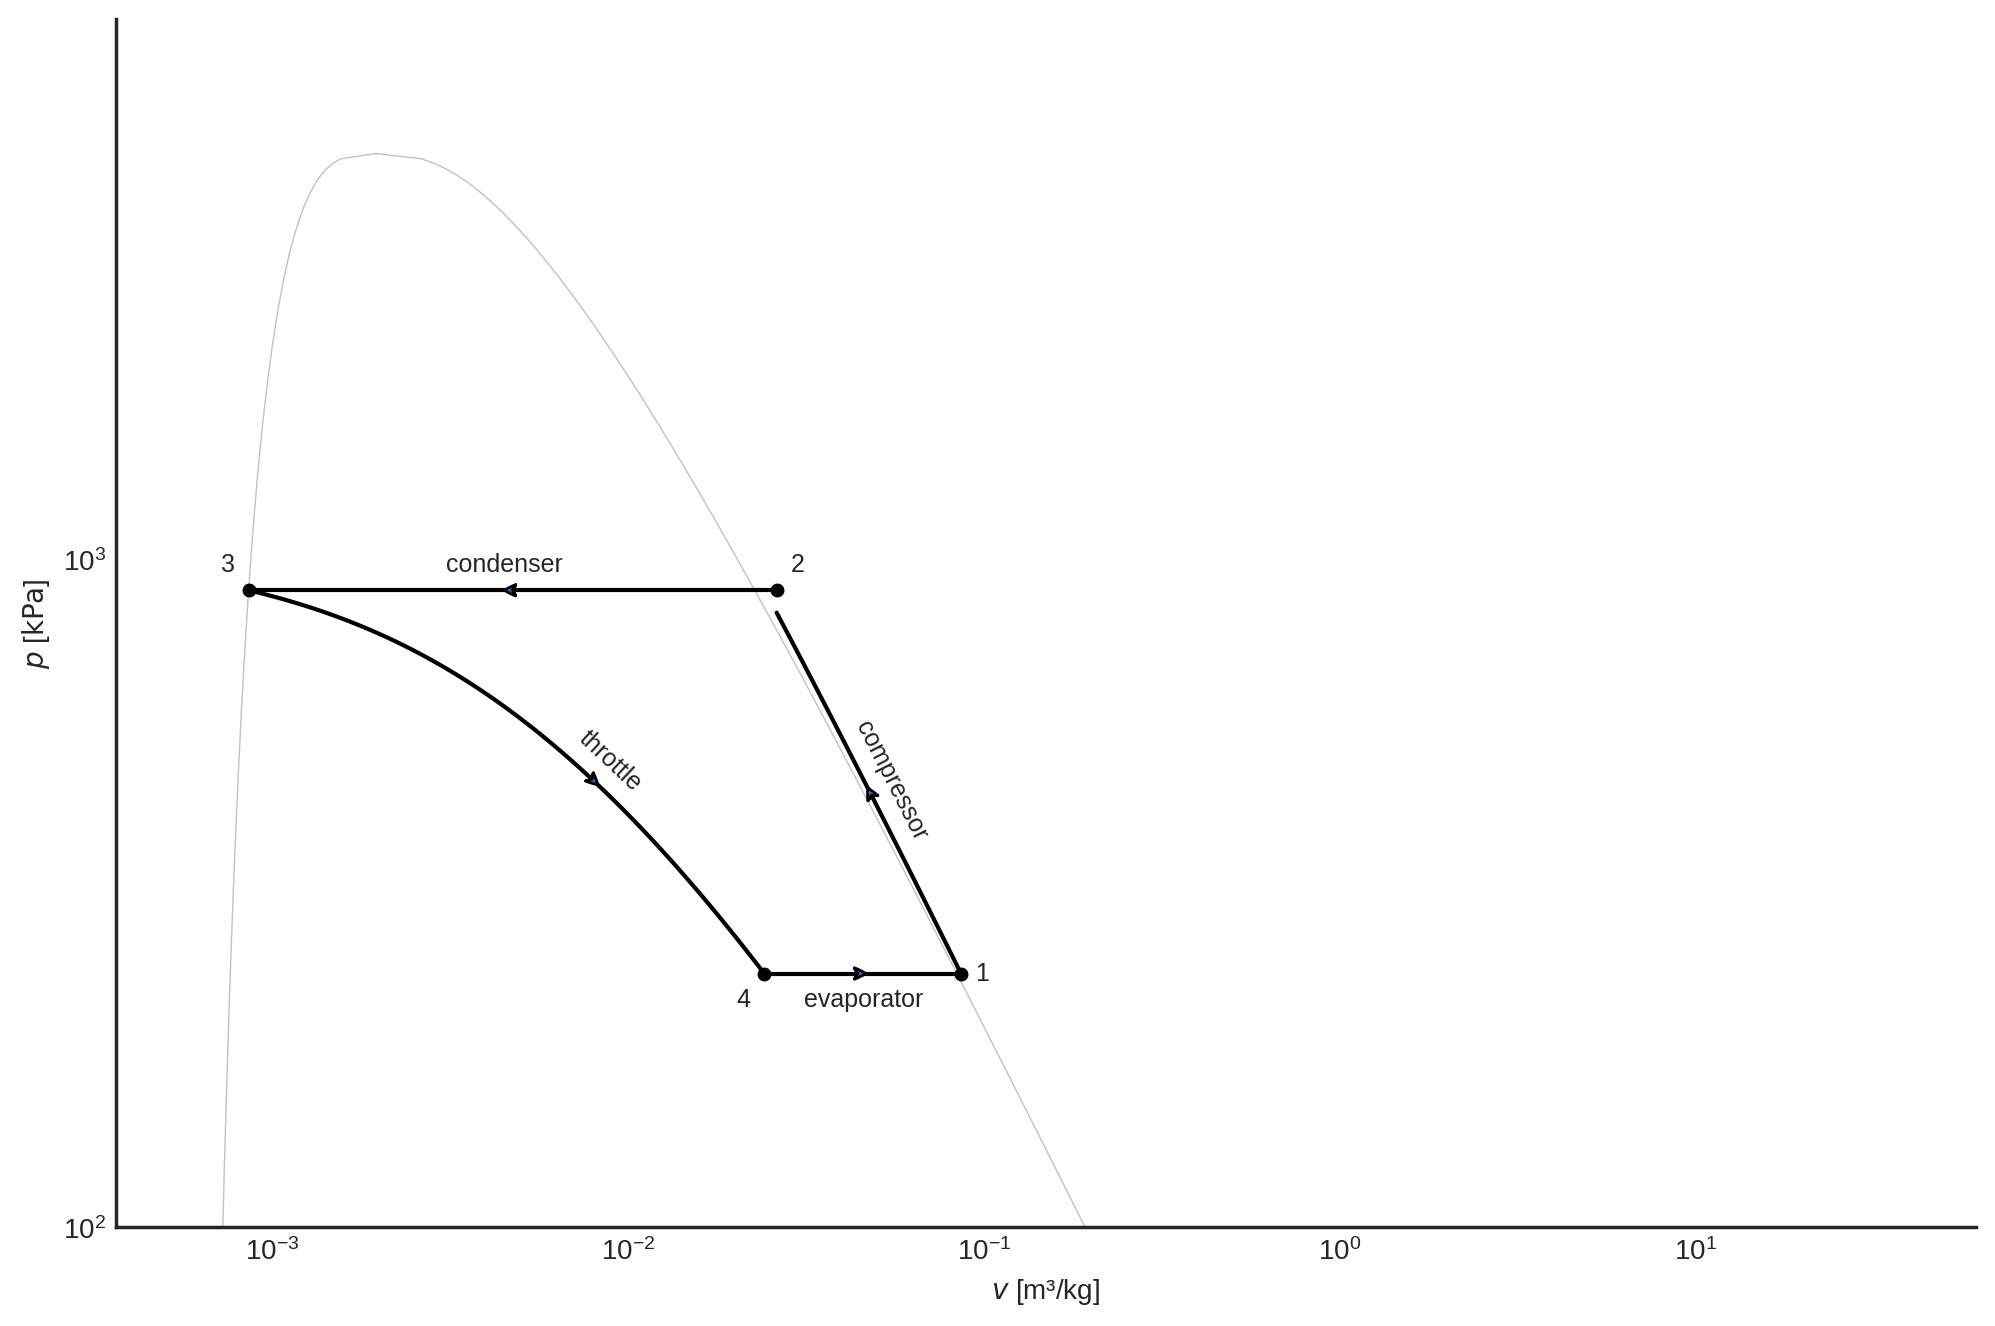

In [13]:
pv = r134a.pv_diagram()
pv.ax.set_ylim(bottom=Quantity(100, 'kPa'))

pv.plot_state(states[1], label_loc='east')
pv.plot_state(states[2], label_loc='north east')
pv.plot_state(states[3], label_loc='north west')
pv.plot_state(states[4], label_loc='south west')

pv.plot_process(states[1], states[2], path='isentropic', label='compressor')
pv.plot_process(states[2], states[3], path='isobaric', label='condenser')
pv.plot_process(states[3], states[4], path='isenthalpic', label='throttle')
pv.plot_process(states[4],
                states[1],
                path='isobaric',
                label='evaporator',
                labelprops=dict(va='top'));

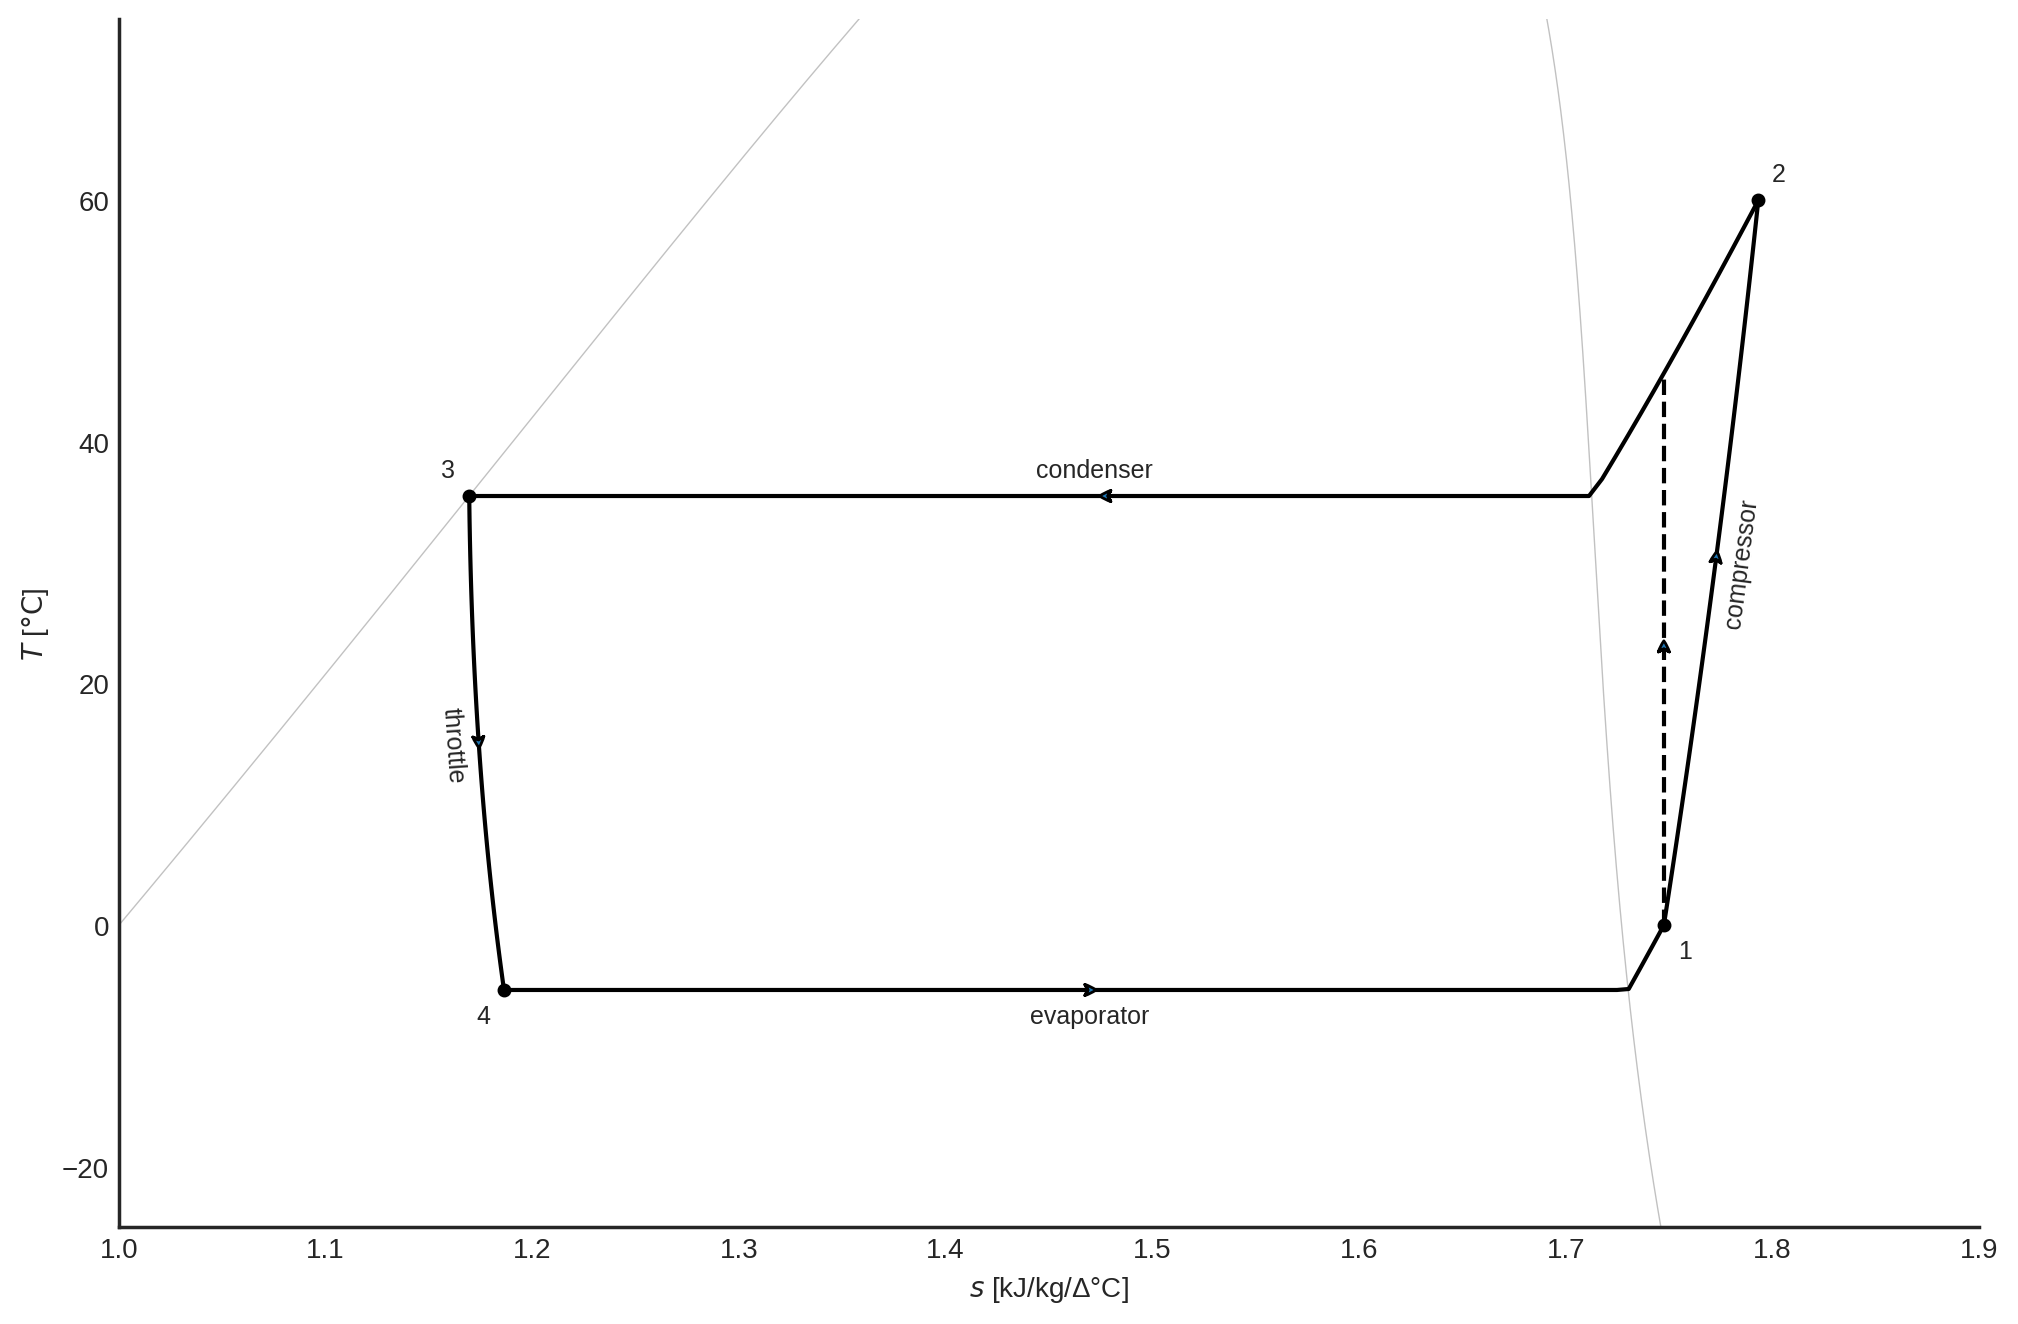

In [14]:
Ts = r134a.Ts_diagram()
Ts.ax.set_ylim(bottom=-25, top=75)
Ts.ax.set_xlim(left=1, right=1.9)

Ts.plot_state(states[1], label_loc='south east')
Ts.plot_state(states[2], label_loc='north east')
Ts.plot_state(states[3], label_loc='north west')
Ts.plot_state(states[4], label_loc='south west')

Ts.plot_process(states[1],
                states[2],
                path='nonideal',
                label='compressor',
                labelprops=dict(va='top'))
Ts.plot_process(states[1], states['2s'], path='isentropic', linestyle='dashed')
Ts.plot_process(states[2], states[3], path='isobaric', label='condenser')
Ts.plot_process(states[3],
                states[4],
                path='isenthalpic',
                label='throttle',
                labelprops=dict(va='top'))
Ts.plot_process(states[4],
                states[1],
                path='isobaric',
                label='evaporator',
                labelprops=dict(va='top'));

In [16]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 4) Execute this cell to create an HTML file showing only the output 
# 5) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html --no-input --no-prompt "Ex11.3 Heat Pump.ipynb"